In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE

In [3]:
# Step 1: Load the Data
df = pd.read_csv('creditcard.csv') #copy the path of .csv file or dataset

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the dataset')

No Frauds 99.827 % of the dataset
Frauds 0.173 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

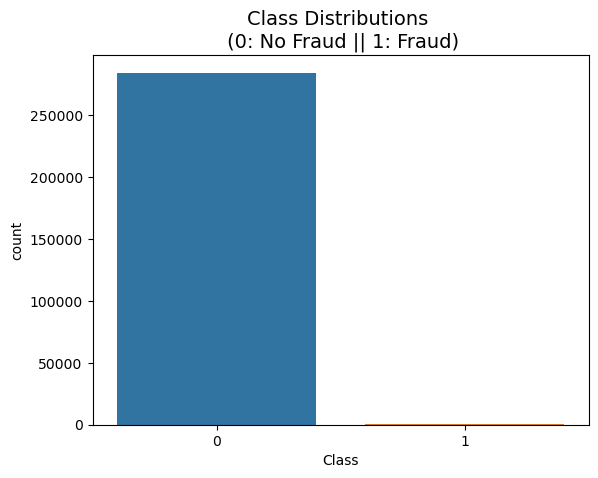

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Class',data = df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

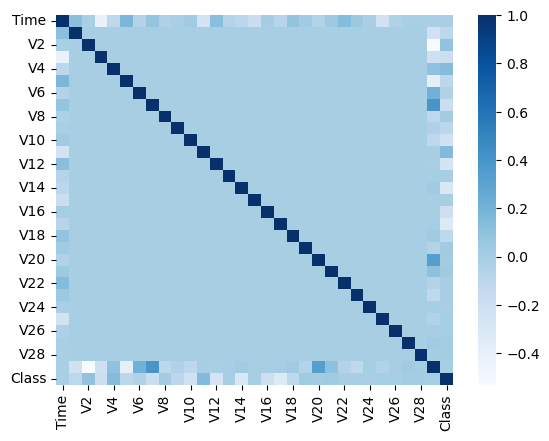

In [15]:
dataplot = sns.heatmap(df.corr(), cmap="Blues") 
plt.show() 

We observe that V4, V11, V2 has more stronger correlation with class, while V12, V14 and V15 has negative correlation

In [18]:
X = df.drop(["Time", "Class"], axis=1)
y = df['Class']

In [20]:
#Normalising input variables
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[9.35192337e-01, 7.66490419e-01, 8.81364903e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [9.78541955e-01, 7.70066651e-01, 8.40298490e-01, ...,
        4.16345145e-01, 3.13422664e-01, 1.04705276e-04],
       [9.35217023e-01, 7.53117667e-01, 8.68140819e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.90904812e-01, 7.64079694e-01, 7.81101998e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.54208999e-01, 7.72855742e-01, 8.49587129e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [9.49231759e-01, 7.65256401e-01, 8.49601462e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [24]:
y_train.value_counts()


Class
0    227451
1       394
Name: count, dtype: int64

In [26]:
#Using SMOTE for balancing the data
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [27]:
y_train.value_counts()


Class
0    227451
1    227451
Name: count, dtype: int64

In [36]:
# Helper function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

    # Print classification report and confusion matrix
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    
    # Calculate AUPRC
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auprc = auc(recall, precision)
    avg_precision = average_precision_score(y_test, y_prob)
    print(f"AUPRC: {auprc:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")

    # Plot Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve: {model.__class__.__name__}')
    plt.show()
    
    return auprc

Logistic Regression


C:\Users\iamit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     56864
           1       0.97      0.91      0.94     56864

    accuracy                           0.94    113728
   macro avg       0.94      0.94      0.94    113728
weighted avg       0.94      0.94      0.94    113728

[[55428  1436]
 [ 5298 51566]]
AUPRC: 0.9814
Average Precision: 0.9814


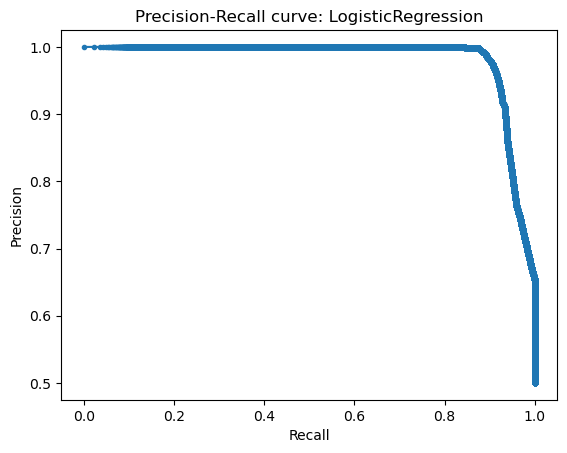

Random Forest
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     56864
           1       1.00      0.85      0.92     56864

    accuracy                           0.92    113728
   macro avg       0.93      0.92      0.92    113728
weighted avg       0.93      0.92      0.92    113728

[[56851    13]
 [ 8543 48321]]
AUPRC: 0.9899
Average Precision: 0.9847


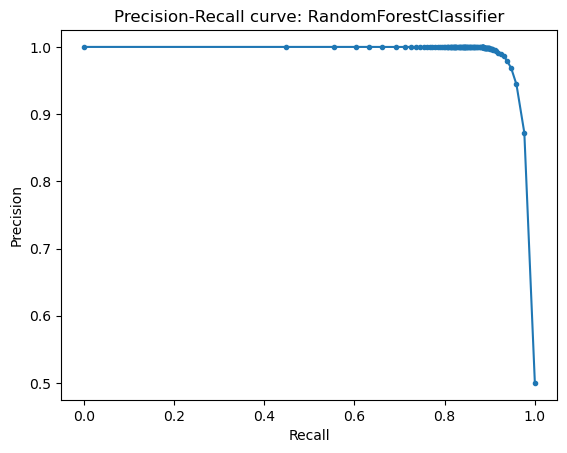

Gradient Boosting
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56864
           1       0.99      0.91      0.95     56864

    accuracy                           0.95    113728
   macro avg       0.95      0.95      0.95    113728
weighted avg       0.95      0.95      0.95    113728

[[56090   774]
 [ 5205 51659]]
AUPRC: 0.9902
Average Precision: 0.9901


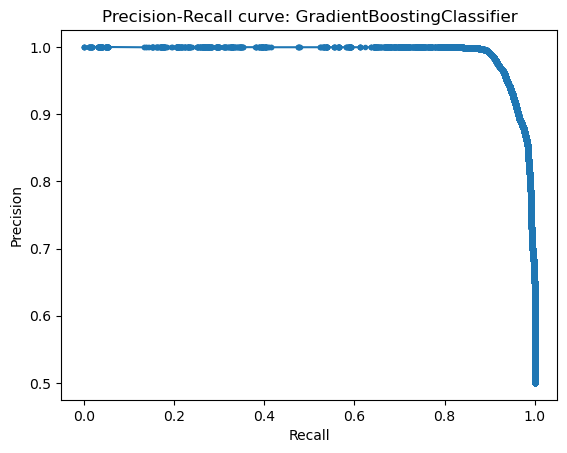

The best model is: Gradient Boosting with an AUPRC of 0.9902


In [38]:
#Train and Evaluate Multiple Models

# Logistic Regression
print("Logistic Regression")
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_auprc = evaluate_model(lr, X_test, y_test)

# Random Forest
print("Random Forest")
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_auprc = evaluate_model(rf, X_test, y_test)

# Gradient Boosting
print("Gradient Boosting")
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_auprc = evaluate_model(gb, X_test, y_test)

# Find the best model based on AUPRC 
#The Area Under the Precision-Recall Curve (AUPRC) is a metric used to evaluate the performance of binary classification models, 
#particularly in scenarios with imbalanced classes, such as fraud detection, anomaly detection, or rare disease diagnosis.
models_auprc = {
    "Logistic Regression": lr_auprc,
    "Random Forest": rf_auprc,
    "Gradient Boosting": gb_auprc
}

best_model_name = max(models_auprc, key=models_auprc.get)
best_model_auprc = models_auprc[best_model_name]
print(f"The best model is: {best_model_name} with an AUPRC of {best_model_auprc:.4f}")